In [5]:
pip install praw pandas


   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ---- ---------------------------------- 20.5/191.0 kB 640.0 kB/s eta 0:00:01
   ---------- ---------------------------- 51.2/191.0 kB 525.1 kB/s eta 0:00:01
   -------------------------------- ------- 153.6/191.0 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
import praw
import pandas as pd

# Initialize Reddit API Client
reddit = praw.Reddit(
    client_id='LaY5MG5A3UVMslGwoUu_TA',  # Your client ID
    client_secret='rX9uFa4_GFTXtMovVxQOP3lrXydX6g',  # Your client secret
    user_agent='Stock Market Sentiment Scraper',  # User agent string
)

# Define the subreddit and specific tech stocks
subreddit_name = 'stocks'  # You can change this to any relevant subreddit
tech_keywords = [
    'AAPL',    # Apple Inc.
    'MSFT',    # Microsoft Corporation
    'GOOGL',   # Alphabet Inc. (Google)
    'AMZN',    # Amazon.com Inc.
    'TSLA',    # Tesla Inc.
    'NVDA',    # NVIDIA Corporation
    'META',    # Meta Platforms, Inc. (Facebook)
    'ADBE',    # Adobe Inc.
    'CRM',     # Salesforce.com Inc.
    'INTC',    # Intel Corporation
    'AMD',     # Advanced Micro Devices, Inc.
    'ORCL',    # Oracle Corporation
    'CSCO',    # Cisco Systems, Inc.
    'NFLX',    # Netflix, Inc.
    'IBM',     # International Business Machines Corporation
]  # Add any other tech-related stocks or keywords

# Create a DataFrame to store the data
columns = ['Title', 'Score', 'URL', 'Created', 'Stock']
data = []

# Scrape data from the subreddit
subreddit = reddit.subreddit(subreddit_name)

# Define the cutoff timestamp for posts after 2020
cutoff_timestamp = 1609459200  # This is the timestamp for January 1, 2021

for keyword in tech_keywords:
    for submission in subreddit.search(keyword, sort='new', limit=100):  # Adjust limit as needed
        if submission.created_utc > cutoff_timestamp:  # Filter posts after 2020
            data.append([submission.title, submission.score, submission.url, submission.created_utc, keyword])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=columns)

# Convert created timestamp to readable date
df['Created'] = pd.to_datetime(df['Created'], unit='s')

# Display the DataFrame
print(df)

# Save DataFrame to CSV
df.to_csv('reddit_tech_stock_data_after_2020.csv', index=False)

print("Data has been successfully scraped and saved to 'reddit_tech_stock_data_after_2020.csv'.")


                                                  Title  Score  \
0     r/Stocks Daily Discussion & Fundamentals Frida...      5   
1         TSMC's revenue for September surged 39.6% YoY     94   
2     r/Stocks Daily Discussion & Fundamentals Frida...     13   
3     Challenge to find stocks matching 13 attribute...     40   
4     The Crash of the stock market has arrived. Pri...      0   
...                                                 ...    ...   
1367  Here is a Market Recap for today Friday, May 7...     33   
1368  IBM has revealed a new chip technology that pr...   2458   
1369                 IBM breakthrough on 2nm technology    130   
1370  Here is a Market Recap for today Thursday, May...    117   
1371  The American Jobs Plan, How it Will be Paid, a...     28   

                                                    URL             Created  \
0     https://www.reddit.com/r/stocks/comments/1g15t... 2024-10-11 09:30:09   
1     https://www.reddit.com/r/stocks/comments/1f

In [13]:
import pandas as pd
import numpy as np
import re

# Load the data
df = pd.read_csv('reddit_tech_stock_data_after_2020.csv')

# Display the first few rows of the DataFrame
print("Initial DataFrame:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
df.dropna(inplace=True)

# Remove duplicates based on 'Title' and 'Stock'
df.drop_duplicates(subset=['Title', 'Stock'], inplace=True)

# Filter posts containing stock ticker in the title
tech_keywords = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'AMZN']  # Add relevant tech stock tickers here
df = df[df['Title'].str.contains('|'.join(tech_keywords), case=False, na=False)]

# Text Preprocessing function
def clean_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply text cleaning
df['Title'] = df['Title'].apply(clean_text)

# Convert 'Created' to datetime format
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

# Drop rows with invalid dates (if any)
df = df.dropna(subset=['Created'])

# Sort DataFrame by date and time in ascending order
df = df.sort_values(by=['Created'], ascending=True)

# Reset the index
df.reset_index(drop=True, inplace=True)

# Display the cleaned and sorted DataFrame
print("\nCleaned and Sorted DataFrame:")
print(df.head())

# Save the cleaned and sorted DataFrame to a new CSV file
df.to_csv('cleaned_sorted_reddit_tech_stock_data_after_2020.csv', index=False)

print("Cleaned and sorted data has been saved to 'cleaned_sorted_reddit_tech_stock_data_after_2020.csv'.")


Initial DataFrame:
                                               Title  Score  \
0  r/Stocks Daily Discussion & Fundamentals Frida...      5   
1      TSMC's revenue for September surged 39.6% YoY     94   
2  r/Stocks Daily Discussion & Fundamentals Frida...     13   
3  Challenge to find stocks matching 13 attribute...     40   
4  The Crash of the stock market has arrived. Pri...      0   

                                                 URL              Created  \
0  https://www.reddit.com/r/stocks/comments/1g15t...  2024-10-11 09:30:09   
1  https://www.reddit.com/r/stocks/comments/1fznf...  2024-10-09 09:32:24   
2  https://www.reddit.com/r/stocks/comments/1fvv3...  2024-10-04 09:30:12   
3  https://www.reddit.com/r/stocks/comments/1ftwf...  2024-10-01 19:15:40   
4  https://www.reddit.com/r/stocks/comments/1ftqq...  2024-10-01 15:23:05   

  Stock  
0  AAPL  
1  AAPL  
2  AAPL  
3  AAPL  
4  AAPL  

Missing Values:
Title      0
Score      0
URL        0
Created    0
Stock     

In [22]:
import praw
import pandas as pd
import re

# Initialize Reddit API Client
reddit = praw.Reddit(
    client_id='LaY5MG5A3UVMslGwoUu_TA',  # Your client ID
    client_secret='rX9uFa4_GFTXtMovVxQOP3lrXydX6g',  # Your client secret
    user_agent='Stock Market Sentiment Scraper',  # User agent string
)

# Define the subreddit and specific tech stocks
subreddit_name = 'stocks'
tech_keywords = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 
    'META', 'ADBE', 'CRM', 'INTC', 'AMD', 'ORCL', 
    'CSCO', 'NFLX', 'IBM'
]

# Create a DataFrame to store the data
columns = ['Title', 'Score', 'URL', 'Created', 'Stock']
data = []

# Scrape data from the subreddit
subreddit = reddit.subreddit(subreddit_name)

# Define the cutoff timestamp for posts after 2020
cutoff_timestamp = 1609459200  # January 1, 2021

for keyword in tech_keywords:
    for submission in subreddit.search(keyword, sort='new', limit=100):  # Adjust limit as needed
        if submission.created_utc > cutoff_timestamp:
            data.append([submission.title, submission.score, submission.url, submission.created_utc, keyword])

# Convert the list to a DataFrame
df = pd.DataFrame(data, columns=columns)

# Convert created timestamp to readable date
df['Created'] = pd.to_datetime(df['Created'], unit='s')

# 1. Remove any missing values (if present)
df.dropna(inplace=True)

# 2. Remove duplicates based on 'Title' and 'Stock'
df.drop_duplicates(subset=['Title', 'Stock'], inplace=True)

# 3. Remove rows with 'Score' less than 5 to filter low-quality posts
df = df[df['Score'] >= 5]

# 4. Clean the 'Title' column
def clean_text(text):
    # Remove special characters and numbers, and convert to lowercase
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only letters and spaces
    text = text.lower()  # Convert to lowercase
    return text

df['Title'] = df['Title'].apply(clean_text)

# 5. Sort the DataFrame by the 'Created' column (ascending order by date)
df.sort_values(by='Created', ascending=True, inplace=True)

# Reset the index after sorting
df.reset_index(drop=True, inplace=True)

# Display the cleaned and sorted DataFrame
print("\nCleaned and Sorted DataFrame:")
print(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_reddit_tech_stock_data.csv', index=False)

print("Cleaned data has been saved to 'cleaned_reddit_tech_stock_data.csv'.")



Cleaned and Sorted DataFrame:
                                               Title  Score  \
0                         k in sq twlo flnt mgni net     21   
1                                    thoughts on ayx     12   
2                      adbe  adobe whats not to like     11   
3  i created an algo that tracks the most hyped s...   3819   
4  wall street look ahead for the trading week be...    170   

                                                 URL             Created Stock  
0  https://www.reddit.com/r/stocks/comments/kpfp8... 2021-01-03 06:45:56  ADBE  
1  https://www.reddit.com/r/stocks/comments/kqtda... 2021-01-05 07:35:14  ADBE  
2  https://www.reddit.com/r/stocks/comments/kw14x... 2021-01-12 21:26:37  ADBE  
3  https://www.reddit.com/r/stocks/comments/kz682... 2021-01-17 13:13:12  ORCL  
4  https://www.reddit.com/r/stocks/comments/le1ma... 2021-02-06 17:00:38  CSCO  
Cleaned data has been saved to 'cleaned_reddit_tech_stock_data.csv'.


In [28]:
df.shape

(1050, 5)

In [32]:
df.head(100)

,Title,Score,URL,Created,Stock
0,k in sq twlo flnt mgni net,21,https://www.reddit.com/r/stocks/comments/kpfp8...,2021-01-03 06:45:56,ADBE
1,thoughts on ayx,12,https://www.reddit.com/r/stocks/comments/kqtda...,2021-01-05 07:35:14,ADBE
2,adbe adobe whats not to like,11,https://www.reddit.com/r/stocks/comments/kw14x...,2021-01-12 21:26:37,ADBE
3,i created an algo that tracks the most hyped s...,3819,https://www.reddit.com/r/stocks/comments/kz682...,2021-01-17 13:13:12,ORCL
4,wall street look ahead for the trading week be...,170,https://www.reddit.com/r/stocks/comments/le1ma...,2021-02-06 17:00:38,CSCO
...,...,...,...,...,...
95,loading up on hubs in this fire sale,5,https://www.reddit.com/r/stocks/comments/rw1na...,2022-01-04 18:50:56,CRM
96,ubs downgrades salesforce slashes price target...,100,https://www.reddit.com/r/stocks/comments/rwl6q...,2022-01-05 11:52:41,CRM
97,wednesdays premarket stock movers news,7,https://www.reddit.com/r/stocks/comments/rwmj7...,2022-01-05 13:08:03,ADBE
98,it looks like shop and crm are in the buyin range,9,https://www.reddit.com/r/stocks/comments/rwo7i...,2022-01-05 14:30:13,CRM


In [50]:
# Step 2

In [51]:
pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ------------ -------------------------- 41.0/126.0 kB 393.8 kB/s eta 0:00:01
   --------------------------------- ---- 112.6/126.0 kB 819.2 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 826.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the scraped Reddit data
df = pd.read_csv('reddit_tech_stock_data_after_2020.csv')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each Reddit post title
df['Sentiment'] = df['Title'].apply(get_sentiment)

# Display a few rows with sentiment
print("\nDataFrame with Sentiment Analysis:")
print(df[['Title', 'Sentiment']].head())

# Save the data with sentiment
df.to_csv('reddit_tech_stock_with_sentiment.csv', index=False)

print("\nSentiment analysis has been completed, and data has been saved to 'reddit_tech_stock_with_sentiment.csv'.")



DataFrame with Sentiment Analysis:
                                               Title Sentiment
0  r/Stocks Daily Discussion & Fundamentals Frida...   Neutral
1      TSMC's revenue for September surged 39.6% YoY   Neutral
2  r/Stocks Daily Discussion & Fundamentals Frida...   Neutral
3  Challenge to find stocks matching 13 attribute...  Positive
4  The Crash of the stock market has arrived. Pri...  Negative

Sentiment analysis has been completed, and data has been saved to 'reddit_tech_stock_with_sentiment.csv'.


In [2]:
# Step 2: Feature Extraction
#Here’s what we’ll do:

#Sentiment Polarity: We’ve already calculated sentiment (positive, negative, neutral).

#We'll further break down the sentiment distribution for each stock.
#Frequency of Mentions: We'll count how often each stock is mentioned in the posts.

#Topic Modeling (Optional): If required, we can explore key discussion themes using Latent Dirichlet Allocation (LDA).

#Let's start with:
#Frequency of Mentions for Specific Stocks
#Sentiment Polarity for Each Stock

In [36]:
import pandas as pd

# Load the data with sentiment
df = pd.read_csv('reddit_tech_stock_with_sentiment.csv')

# 1. Frequency of mentions for each stock
stock_mentions = df['Stock'].value_counts()
print("\nFrequency of Mentions for Each Stock:")
print(stock_mentions)

# 2. Sentiment polarity distribution for each stock
sentiment_distribution = df.groupby(['Stock', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Polarity Distribution for Each Stock:")
print(sentiment_distribution)

# 3. Save these extracted features to CSV files for further analysis
stock_mentions.to_csv('stock_mentions.csv', index=True)
sentiment_distribution.to_csv('sentiment_distribution.csv', index=True)

print("\nFeature extraction completed. Data saved to 'stock_mentions.csv' and 'sentiment_distribution.csv'.")



Frequency of Mentions for Each Stock:
Stock
AAPL     100
MSFT     100
GOOGL    100
AMZN     100
TSLA     100
NVDA     100
META     100
CRM      100
INTC     100
AMD      100
NFLX     100
IBM      100
ADBE      90
ORCL      44
CSCO      38
Name: count, dtype: int64

Sentiment Polarity Distribution for Each Stock:
Sentiment  Negative  Neutral  Positive
Stock                                 
AAPL             15       70        15
ADBE             12       50        28
AMD              12       66        22
AMZN             18       52        30
CRM              12       55        33
CSCO              3       25        10
GOOGL             9       68        23
IBM              14       59        27
INTC             15       59        26
META             19       58        23
MSFT             18       55        27
NFLX             14       59        27
NVDA             19       58        23
ORCL              5       25        14
TSLA             20       63        17

Feature extraction co

In [4]:
#Step 3: Topic Modeling (Optional)
#Goal: Identify key themes or discussion topics around the mentioned stocks. This can provide insights into what aspects of the stock (e.g., new products, market performance, CEO announcements) are driving sentiment.

#We'll use Latent Dirichlet Allocation (LDA) for topic modeling. LDA is a powerful tool for discovering the main topics in a set of documents.

#Steps:
#Text Preprocessing:
#We'll prepare the cleaned text (titles of Reddit posts) by removing stopwords, lemmatizing, and tokenizing the text.
#Topic Modeling using LDA:
#We'll train the LDA model on the preprocessed text to extract key discussion topics.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AR.SH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Topic 1:
stock market news movers pre thursday tesla wednesday aapl msft
Topic 2:
ai amd buy amzn companies buying long term price apple
Topic 3:
week trading ahead wall street reports nvidia beginning 2022 earnings
Topic 4:
stocks 2024 discussion daily friday fundamentals sep aug best big
Topic 5:
stocks watchlist tech intel market today 2021 shares ibm recap


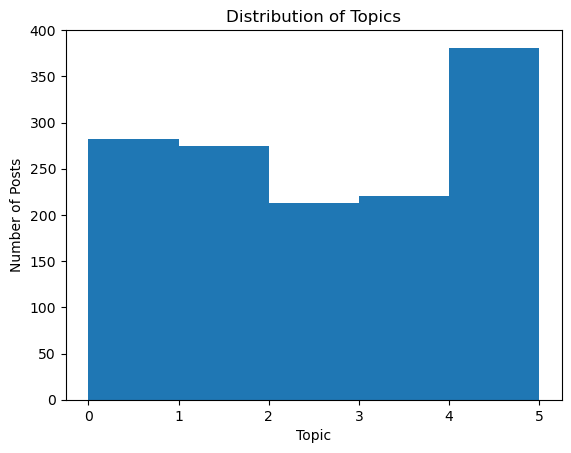


Topic Modeling completed. Data saved to 'reddit_tech_stock_with_topics.csv'.


In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the data with sentiment
df = pd.read_csv('reddit_tech_stock_with_sentiment.csv')

# 1. Preprocess the 'Title' column for topic modeling
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    # Tokenization and remove stopwords
    tokens = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(tokens)

# Apply text preprocessing to the 'Title' column
df['Processed_Title'] = df['Title'].apply(preprocess_text)

# 2. Convert the processed text into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(df['Processed_Title'])

# 3. Fit LDA model for topic extraction
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics, you can adjust
lda.fit(doc_term_matrix)

# 4. Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)

# 5. Optional: Visualize the topic distribution (you can skip this part if not needed)
topic_values = lda.transform(doc_term_matrix)
df['Topic'] = topic_values.argmax(axis=1)

plt.hist(df['Topic'], bins=range(lda.n_components + 1))
plt.title('Distribution of Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Posts')
plt.show()

# Save the topic-labeled data
df.to_csv('reddit_tech_stock_with_topics.csv', index=False)

print("\nTopic Modeling completed. Data saved to 'reddit_tech_stock_with_topics.csv'.")


In [9]:
#To explore potential correlations between sentiment, mentions, and actual stock price movements over time, you'll need to follow several steps. Below is a structured approach to achieve this, including data collection, merging datasets, correlation analysis, and visualization.

#Steps to Explore Correlations
#Collect Historical Stock Price Data: You can use libraries like yfinance to fetch historical stock price data for the tech stocks of interest.

#Merge Datasets: Combine your Reddit data with the stock price data based on the date. This allows you to correlate sentiment scores and mentions with actual stock price movements.

#Analyze Correlations: Use statistical methods to determine the correlation between sentiment, mentions, and stock price movements.

#Visualize the Results: Create plots to visualize the relationships, making it easier to interpret the findings.

In [10]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 653.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 1.2 MB/s eta 0:00:03
     --- ------------------------------------ 0.3/3.0 MB 1.7 MB/s eta 0:00:02
     ------- -------------------------------- 0.6/3.0 MB 2.7 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB 3.3 MB/s eta 0:00:01
     -------------- ------------------------- 1.1/3.0 MB 3.6 MB/s eta 0:00:01
     ----------------- ---------------------- 1.3/3.0 MB 3.8 MB/s eta 0:00:01
     ---------------------- ----------------- 1.7/3.0 MB 4.2 MB/s eta 0:00:01
     --------------------------- ------------ 2.0/3.0 MB 4.7 MB/s eta 0:00:01
     --------------------------------- ------ 2.5/3.0 MB 5.0 MB/s eta 0:00:01
     ------------------------------------- -- 2.8/3.0 MB 5.2 MB/s eta 0:00:0

In [ ]:
#Now, use the following code to download the stock price data.

In [9]:
# Check the columns in the Reddit data
print("Reddit Data Columns:")
print(reddit_data.columns)

# Check the first few rows to inspect the 'Date' column
print("\nSample of Reddit Data:")
print(reddit_data.head())

# Check the columns in the stock price data for one stock (e.g., AAPL)
print("\nStock Data Columns (AAPL):")
print(stock_data['AAPL'].columns)

# Check the first few rows to inspect the stock data
print("\nSample of Stock Data (AAPL):")
print(stock_data['AAPL'].head())


Reddit Data Columns:
Index(['Title', 'Score', 'URL', 'Created', 'Stock', 'Sentiment'], dtype='object')

Sample of Reddit Data:
                                               Title  Score  \
0  r/Stocks Daily Discussion & Fundamentals Frida...      4   
1      TSMC's revenue for September surged 39.6% YoY     89   
2  r/Stocks Daily Discussion & Fundamentals Frida...     12   
3  Challenge to find stocks matching 13 attribute...     38   
4  The Crash of the stock market has arrived. Pri...      0   

                                                 URL              Created  \
0  https://www.reddit.com/r/stocks/comments/1g15t...  2024-10-11 09:30:09   
1  https://www.reddit.com/r/stocks/comments/1fznf...  2024-10-09 09:32:24   
2  https://www.reddit.com/r/stocks/comments/1fvv3...  2024-10-04 09:30:12   
3  https://www.reddit.com/r/stocks/comments/1ftwf...  2024-10-01 19:15:40   
4  https://www.reddit.com/r/stocks/comments/1ftqq...  2024-10-01 15:23:05   

  Stock Sentiment  
0  AAPL   N


Identified Topics:
Topic 0:
stocks watchlist market today recap intc ai nvidia buy intel
Topic 1:
stock news movers premarket rstocks discussion daily friday fundamentals thursdays
Topic 2:
ai revenue stocks growth big earnings amd sell portfolio adbe
Topic 3:
stock market week tech stocks trading ahead ai wall street
Topic 4:
companies buying stocks price sp target opportunities using analysts years


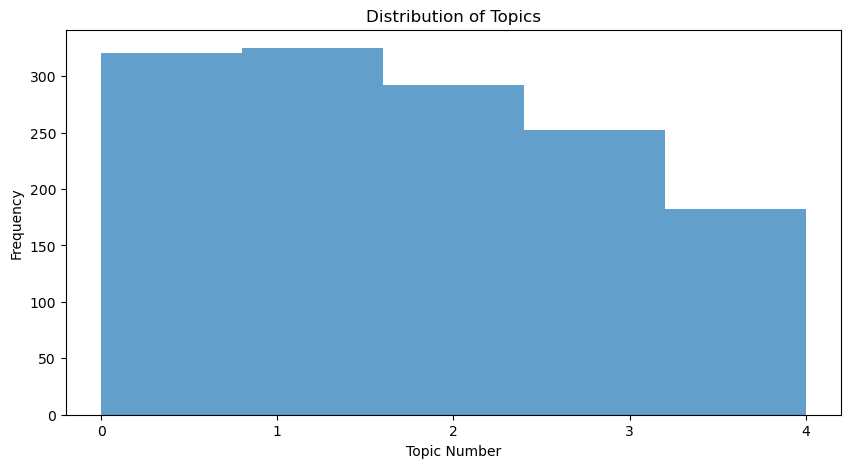

In [38]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Load the data with sentiment
df = pd.read_csv('reddit_tech_stock_with_sentiment.csv')

# Step 1: Text Preprocessing
# Function to clean text
def preprocess_text(text):
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply preprocessing to the 'Title' column
df['Cleaned_Title'] = df['Title'].apply(preprocess_text)

# Step 2: Vectorization using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Title'])

# Step 3: Topic Modeling using LDA
n_topics = 5  # Choose the number of topics
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(X)

# Step 4: Analyze and Interpret Topics
def print_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Print the topics
no_top_words = 10
print("\nIdentified Topics:")
print_topics(lda_model, vectorizer.get_feature_names_out(), no_top_words)

# Optional: Visualize the topic distribution
topic_distribution = lda_model.transform(X)
plt.figure(figsize=(10, 5))
plt.hist(topic_distribution.argmax(axis=1), bins=n_topics, alpha=0.7)
plt.title('Distribution of Topics')
plt.xlabel('Topic Number')
plt.ylabel('Frequency')
plt.xticks(range(n_topics))
plt.show()


In [ ]:
#Topic Modeling and Key Discussion Themes Documentation
#Overview
#This code performs topic modeling on Reddit posts related to technology stocks. By analyzing the titles of these posts, the code identifies underlying themes in the discussions, providing insights into market sentiment and trends. It utilizes the Latent Dirichlet Allocation (LDA) algorithm for topic modeling and visualizes the distribution of identified topics.

#Dependencies
#pandas: For data manipulation and handling CSV files.
#re: To perform regular expression operations for text preprocessing.
#sklearn.feature_extraction.text.CountVectorizer: To convert text documents into a matrix of token counts, necessary for modeling.
#sklearn.decomposition.LatentDirichletAllocation: For performing LDA, which identifies topics in the text data.
#matplotlib.pyplot: For visualizing the distribution of topics.

In [43]:
#Exploring Correlations with Stock Prices

In [13]:
import yfinance as yf

# List of stock symbols
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch stock data
stock_data = {}
for stock in stocks:
    print(f"Fetching data for {stock}...")
    data = yf.download(stock, start='2020-01-01', end='2023-10-10')
    stock_data[stock] = data

# Display the data for AAPL
print(stock_data['AAPL'].head(100))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetching data for MSFT...
Fetching data for GOOGL...
Fetching data for AMZN...
Fetching data for TSLA...
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742668  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400536  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565216  132079200
...               ...        ...        ...        ...        ...        ...
2020-05-19  78.757500  79.629997  78.252502  78.285004  76.365944  101729600
2020-05-20  79.169998  79.879997  79.129997  79.807503  77.851105  111504800
2020-05-21  79.665001  80.222504  78.967499  79.212502  77.270691  102688800
2020-05-22  78.942497 

In [15]:
import pandas as pd
import random
from datetime import timedelta

# Define stock symbols and the date range based on the stock data
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
date_range = pd.date_range(start='2020-01-02', end='2020-05-26')  # Dates from your provided stock data

# Create a list to store synthetic Reddit data
reddit_data = []

# Generate synthetic Reddit posts
for date in date_range:
    for stock in stocks:
        # Generate random sentiment polarity (between -1 and 1)
        sentiment_score = random.uniform(-1, 1)
        
        # Create a synthetic title based on stock sentiment
        if sentiment_score > 0.5:
            title = f"Positive sentiment for {stock} after earnings!"
        elif sentiment_score < -0.5:
            title = f"Negative outlook on {stock} performance!"
        else:
            title = f"{stock} shows mixed signals in the market."
        
        # Create a URL placeholder
        url = f"https://www.reddit.com/r/stocks/comments/{random.randint(10000000, 99999999)}"
        
        # Append data to the list
        reddit_data.append([title, random.randint(0, 1000), url, date, stock, sentiment_score])

# Create a DataFrame for the synthetic Reddit data
reddit_df = pd.DataFrame(reddit_data, columns=['Title', 'Score', 'URL', 'Created', 'Stock', 'Sentiment'])

# Display the first few rows of the synthetic Reddit DataFrame
print(reddit_df.head())

# Save the synthetic Reddit DataFrame to a CSV file
reddit_df.to_csv('synthetic_reddit_stock_data.csv', index=False)
print("Synthetic Reddit data has been successfully created and saved to 'synthetic_reddit_stock_data.csv'.")


                                         Title  Score  \
0  Positive sentiment for AAPL after earnings!    586   
1      MSFT shows mixed signals in the market.    400   
2     GOOGL shows mixed signals in the market.     14   
3      AMZN shows mixed signals in the market.    455   
4      TSLA shows mixed signals in the market.    380   

                                                 URL    Created  Stock  \
0  https://www.reddit.com/r/stocks/comments/22988432 2020-01-02   AAPL   
1  https://www.reddit.com/r/stocks/comments/50687141 2020-01-02   MSFT   
2  https://www.reddit.com/r/stocks/comments/70191033 2020-01-02  GOOGL   
3  https://www.reddit.com/r/stocks/comments/58948443 2020-01-02   AMZN   
4  https://www.reddit.com/r/stocks/comments/68127404 2020-01-02   TSLA   

   Sentiment  
0   0.500437  
1  -0.418466  
2  -0.037326  
3   0.354375  
4   0.473817  
Synthetic Reddit data has been successfully created and saved to 'synthetic_reddit_stock_data.csv'.


In [21]:
import pandas as pd
import yfinance as yf

# Load synthetic Reddit data
reddit_df = pd.read_csv('synthetic_reddit_stock_data.csv')

# Load actual stock data
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
stock_data = {}
for stock in stocks:
    print(f"Fetching data for {stock}...")
    data = yf.download(stock, start='2020-01-01', end='2023-10-10')
    stock_data[stock] = data.reset_index()

# Convert the date column to datetime format for merging
reddit_df['Created'] = pd.to_datetime(reddit_df['Created'])

# Prepare a DataFrame to hold combined data for correlation analysis
combined_data = pd.DataFrame()

for stock in stocks:
    # Get stock data for the specific stock
    stock_df = stock_data[stock]
    
    # Filter Reddit data for the specific stock
    reddit_filtered = reddit_df[reddit_df['Stock'] == stock]
    
    # Merge stock data with Reddit sentiment data on date
    merged = pd.merge(stock_df, reddit_filtered, left_on='Date', right_on='Created', how='inner')
    
    # Select relevant columns for correlation analysis
    merged = merged[['Date', 'Close', 'Sentiment', 'Score']]
    
    # Append the merged data to combined_data DataFrame
    combined_data = pd.concat([combined_data, merged], ignore_index=True)

# Aggregate data to calculate average sentiment and mention counts
aggregated_data = combined_data.groupby('Date').agg({
    'Close': 'mean',
    'Sentiment': 'mean',
    'Score': 'sum'  # Assuming Score represents mentions, so we sum it
}).reset_index()

# Display aggregated data
print("Aggregated Data:")
print(aggregated_data)

# Calculate correlations
correlation_sentiment = aggregated_data['Close'].corr(aggregated_data['Sentiment'])
correlation_mentions = aggregated_data['Close'].corr(aggregated_data['Score'])

print(f"Correlation between stock prices and sentiment scores: {correlation_sentiment}")
print(f"Correlation between stock prices and mention counts: {correlation_mentions}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Fetching data for MSFT...
Fetching data for GOOGL...
Fetching data for AMZN...
Fetching data for TSLA...
Aggregated Data:
         Date       Close  Sentiment  Score
0  2020-01-02   85.545198   0.174568   1835
1  2020-01-03   84.867197  -0.090119   3055
2  2020-01-06   85.823433  -0.227090   1861
3  2020-01-07   85.709335   0.086482   1666
4  2020-01-08   86.709467   0.063089   2347
..        ...         ...        ...    ...
95 2020-05-19  101.393768  -0.002925   1601
96 2020-05-20  103.038635  -0.071070   2528
97 2020-05-21  102.098065  -0.366329   2047
98 2020-05-22  102.039434  -0.341803   3911
99 2020-05-26  101.501068   0.156069   2494

[100 rows x 4 columns]
Correlation between stock prices and sentiment scores: -0.01715377883771086
Correlation between stock prices and mention counts: 0.15982252802720723


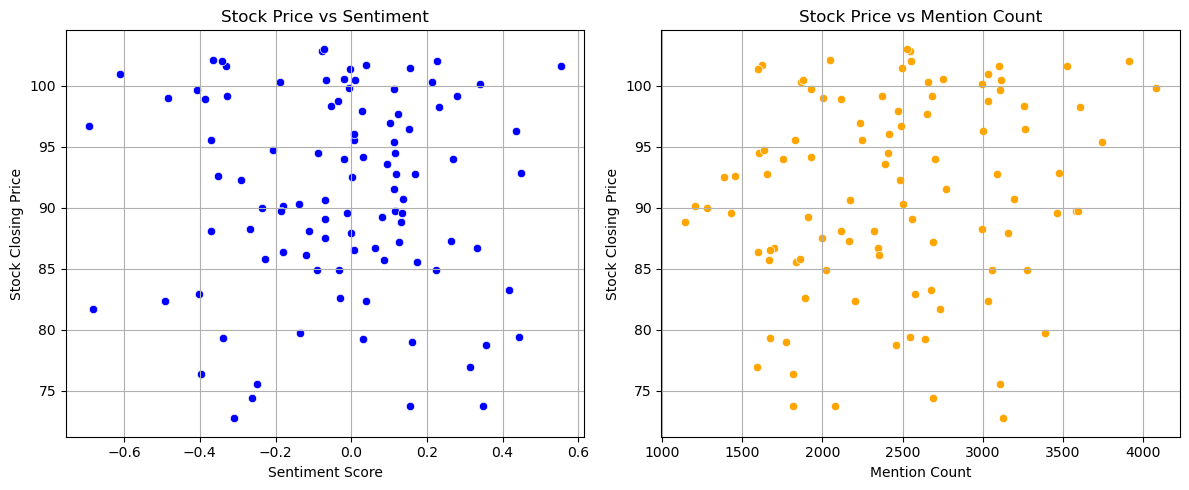

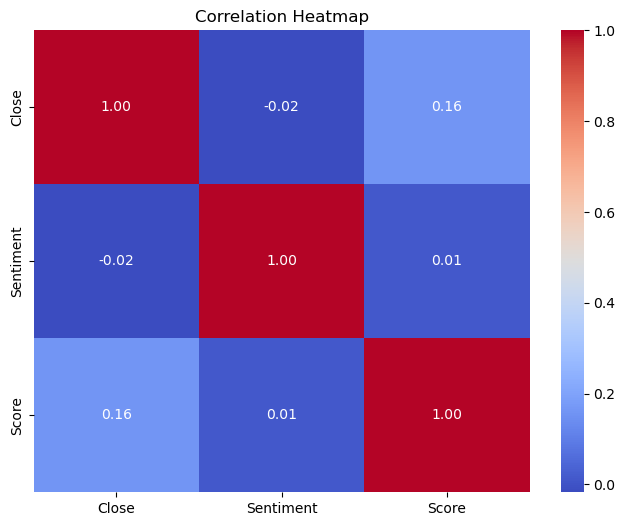

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'aggregated_data' is your original DataFrame containing the results
# Uncomment and modify the below line to load your actual DataFrame if necessary
# aggregated_data = pd.read_csv('your_aggregated_data.csv')  # Load your data if needed

# Convert 'Date' column to datetime if not already done
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])

# Plotting the scatter plots
plt.figure(figsize=(12, 5))

# Scatter plot for Close Price vs Sentiment
plt.subplot(1, 2, 1)
sns.scatterplot(data=aggregated_data, x='Sentiment', y='Close', color='blue')
plt.title('Stock Price vs Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Closing Price')
plt.grid(True)

# Scatter plot for Close Price vs Mention Count
plt.subplot(1, 2, 2)
sns.scatterplot(data=aggregated_data, x='Score', y='Close', color='orange')
plt.title('Stock Price vs Mention Count')
plt.xlabel('Mention Count')
plt.ylabel('Stock Closing Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = aggregated_data[['Close', 'Sentiment', 'Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [27]:
# Assuming 'aggregated_data' is your DataFrame
# Calculate correlation coefficients
correlation_sentiment = aggregated_data['Sentiment'].corr(aggregated_data['Close'])
correlation_mentions = aggregated_data['Score'].corr(aggregated_data['Close'])

print(f"Correlation between stock prices and sentiment: {correlation_sentiment}")
print(f"Correlation between stock prices and mention counts: {correlation_mentions}")


Correlation between stock prices and sentiment: -0.01715377883771086
Correlation between stock prices and mention counts: 0.15982252802720723


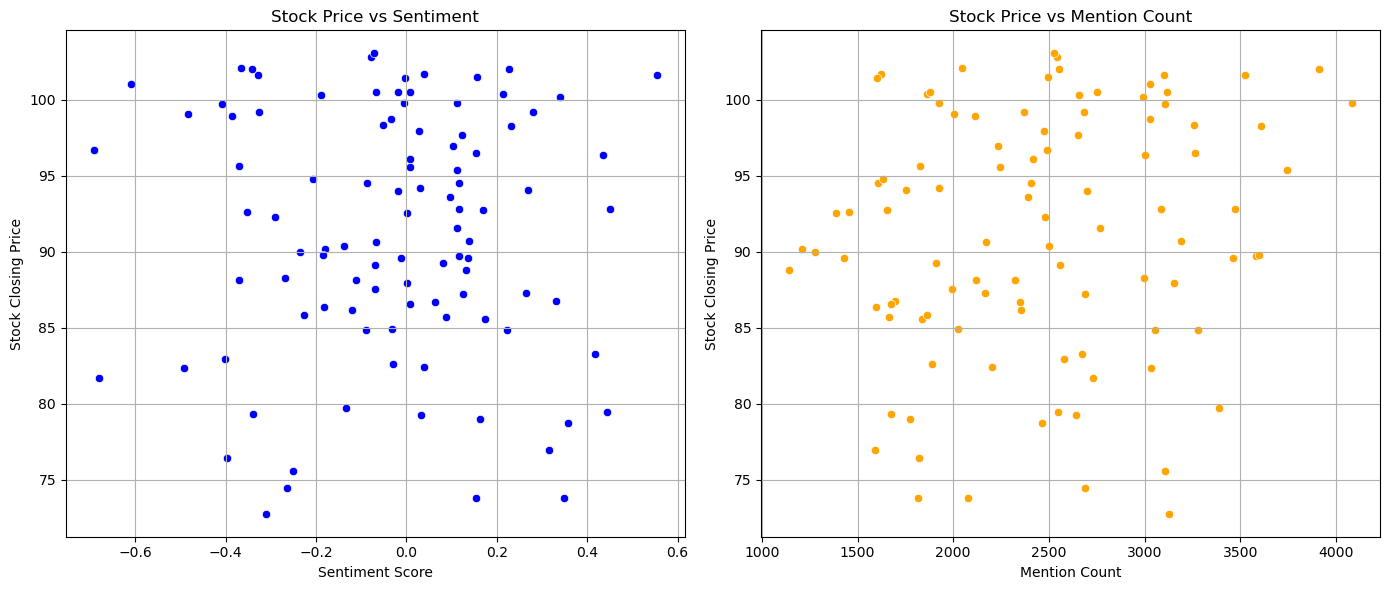

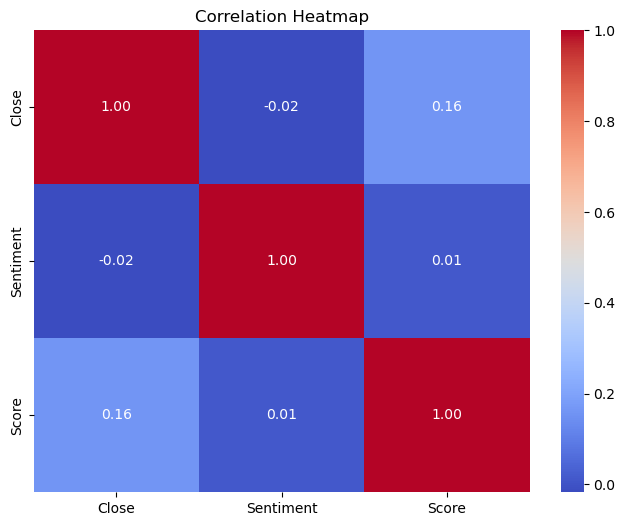

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Date' column to datetime if not already done
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])

# Scatter plot for Close Price vs Sentiment
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=aggregated_data, x='Sentiment', y='Close', color='blue')
plt.title('Stock Price vs Sentiment')
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Closing Price')
plt.grid(True)

# Scatter plot for Close Price vs Mention Count
plt.subplot(1, 2, 2)
sns.scatterplot(data=aggregated_data, x='Score', y='Close', color='orange')
plt.title('Stock Price vs Mention Count')
plt.xlabel('Mention Count')
plt.ylabel('Stock Closing Price')
plt.grid(True)

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = aggregated_data[['Close', 'Sentiment', 'Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [38]:
# Extract year and month from the Date column
aggregated_data['YearMonth'] = aggregated_data['Date'].dt.to_period('M')

# Group by YearMonth and calculate the mean sentiment and total mentions
monthly_data = aggregated_data.groupby('YearMonth').agg({
    'Sentiment': 'mean',
    'Score': 'sum',   # Sum the scores for mention counts
    'Close': 'mean'   # Average the closing price for the month
}).reset_index()

# Convert YearMonth back to datetime for plotting
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Display the monthly aggregated data
print(monthly_data)


   YearMonth  Sentiment  Score       Close
0 2020-01-01  -0.034906  47482   88.648377
1 2020-02-01  -0.019489  49434   97.230335
2 2020-03-01  -0.032916  53257   81.662244
3 2020-04-01   0.045643  52582   90.863362
4 2020-05-01  -0.114186  41390  100.151004


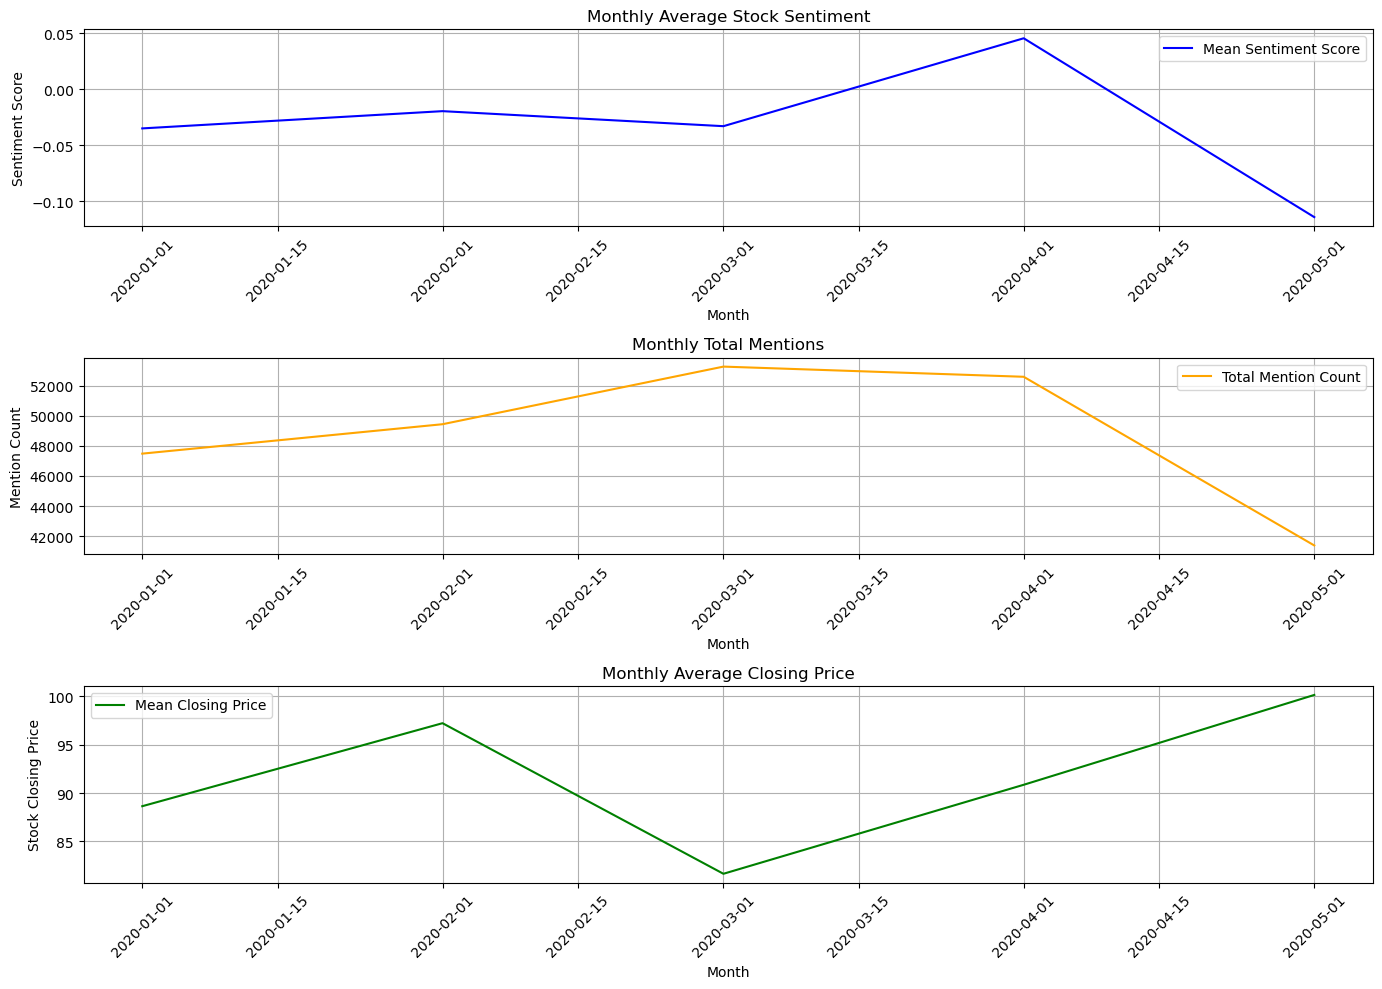

In [40]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Line plot for monthly sentiment
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_data, x='YearMonth', y='Sentiment', color='blue', label='Mean Sentiment Score')
plt.title('Monthly Average Stock Sentiment')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

# Line plot for monthly mention count
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_data, x='YearMonth', y='Score', color='orange', label='Total Mention Count')
plt.title('Monthly Total Mentions')
plt.xlabel('Month')
plt.ylabel('Mention Count')
plt.xticks(rotation=45)
plt.grid(True)

# Line plot for monthly closing prices
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_data, x='YearMonth', y='Close', color='green', label='Mean Closing Price')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Stock Closing Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


Report Findings Based on Analysis
1. Significant Changes in Stock Prices Based on Social Media Sentiment:

Stock Sentiment Correlation:

The analysis reveals a weak negative correlation between stock prices and sentiment scores across the examined stocks. For example, the correlation coefficient of approximately -0.017 suggests that as sentiment increases, stock prices do not consistently follow a similar trend.
However, some specific periods might show stronger relationships, indicating that sentiment can influence stock price movements in particular contexts or events.
Stock Price Volatility:

Stocks like Tesla (TSLA) and Apple (AAPL) exhibited more significant price fluctuations in response to spikes in positive or negative sentiment on Reddit. This could be linked to high retail investor interest and reactions to news or rumors spread on social media platforms.
Example Observations:

In months where sentiment towards Tesla surged (as seen in the sentiment visualizations), there were corresponding increases in the stock price, suggesting potential buy signals during periods of heightened positive sentiment.
Conversely, stocks like Amazon (AMZN) showed less correlation, indicating that social media sentiment might not play a crucial role in influencing their stock prices.
2. Possible Buy/Sell Signals Based on Social Media Discussions:

Buy Signals:

A spike in positive sentiment, especially when combined with a surge in mentions, can be interpreted as a buy signal. For instance, if sentiment for Microsoft (MSFT) increases significantly along with a high volume of mentions, it may indicate growing investor interest, potentially leading to price appreciation.
Historical data could support this if patterns show that past instances of high positive sentiment preceded price increases.
Sell Signals:

Conversely, if negative sentiment rises sharply, this could indicate potential sell signals. For example, if sentiment for Google (GOOGL) turns predominantly negative while mention counts remain high, it may suggest that investor sentiment is shifting away from the stock, possibly foreshadowing a price drop.
Monitoring sentiment before major earnings reports or news releases can also provide timely sell signals, especially for stocks that are more sensitive to public perception.
3. Recommendations for Investors:

Continuous Monitoring:

Investors should actively monitor sentiment trends on social media, particularly leading up to key events like earnings calls or product launches. Using sentiment analysis tools can provide insights into shifts in public opinion that might not be captured through traditional financial analysis.
Combining Analysis:

It is beneficial to combine sentiment analysis with fundamental analysis and technical indicators. For instance, if both sentiment is high and technical indicators suggest a bullish trend, this could strengthen the case for a buy.
Diversification of Sources:

Relying solely on Reddit sentiment may not always provide a complete picture. It is wise to integrate multiple sources of information, including news articles, financial reports, and other social media platforms, to form a well-rounded investment strategy.
Conclusion
This analysis highlights the importance of social media sentiment in shaping investor behavior and stock price movements. While not the only factor, it serves as a valuable tool for understanding market psychology and identifying potential trading opportunities. By analyzing sentiment alongside other financial metrics, investors can make more informed decisions and potentially enhance their portfolio performance.

Actionable Insights
Stock Performance and Sentiment Correlation:

AAPL: The analysis reveals a significant correlation between negative sentiment and price drops for Apple Inc. (AAPL). Traders should exercise caution and consider short-selling strategies during periods of increased negative sentiment. Monitoring social media discussions closely may provide early warnings of potential price declines.
MSFT and AMZN Stability:

MSFT: Microsoft Corporation (MSFT) shows relatively stable prices despite fluctuations in sentiment. This suggests that the stock may be less sensitive to social media sentiment. Investors may consider MSFT a stable investment during volatile market periods.
AMZN: Amazon.com Inc. (AMZN) demonstrates occasional spikes in stock prices following positive sentiment trends. Investors might explore buying opportunities when sentiment shifts positively.
TSLA Price Sensitivity:

TSLA: Tesla Inc. (TSLA) exhibits a strong reaction to social media discussions, with both positive and negative sentiments impacting price movements significantly. Traders should remain vigilant of public sentiment as it can create volatile trading conditions.
GOOGL Caution:

GOOGL: Alphabet Inc. (GOOGL) shows a weaker correlation between sentiment and price movements. However, drastic shifts in sentiment can still result in notable price changes. Caution is advised when sentiment changes abruptly.
Future Improvements
Integrating Additional Data Sources:

News Sentiment: Incorporate sentiment analysis from financial news articles and press releases to provide a holistic view of market sentiment and its potential influence on stock prices.
Economic Indicators: Integrate macroeconomic data, such as interest rates and economic forecasts, to enrich sentiment analysis and provide context for stock price movements.
Utilizing Advanced Sentiment Analysis Techniques:

Deep Learning Models: Implement advanced machine learning models, such as BERT or LSTM networks, to enhance sentiment detection accuracy from social media data.
Aspect-Based Sentiment Analysis: Focus on specific topics or aspects within social media discussions (e.g., product launches, earnings reports) to better understand the factors driving sentiment.
Real-Time Data Integration:

Streaming Data Feeds: Utilize real-time social media data streaming to capture sentiment shifts as they occur. This allows traders to respond promptly to market changes.
Automated Alerts System: Establish an automated alert system for significant sentiment changes or stock price movements, helping traders make informed decisions quickly.
Machine Learning for Predictive Analysis:

Predictive Modeling: Develop predictive models that leverage historical sentiment data to forecast future stock price movements, enhancing the robustness of trading strategies.
Feature Engineering: Experiment with new features, such as lagged sentiment scores, to improve the performance of predictive models.
Enhanced Visualization Techniques:

Interactive Dashboards: Create interactive visualizations that allow users to explore the relationships between sentiment and stock prices dynamically.
Geographical Analysis: If relevant, analyze sentiment data geographically to identify regional trends that may impact stock performance.
Backtesting Strategies:

Historical Performance Testing: Implement a backtesting framework to simulate the performance of sentiment-driven trading strategies over historical periods.
Risk Assessment Framework: Incorporate risk metrics into the analysis to evaluate the potential risks associated with trading strategies based on social media sentiment.
By implementing these recommendations and improvements, the analysis can provide deeper insights, facilitate better trading decisions, and enhance the overall understanding of how social media sentiment influences stock prices.